In [1]:
# Change run time type and select GPU mode

!pip install face-recognition

     |████████████████████████████████| 100.1 MB 20 kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566186 sha256=a4bc6babf33d9ec9f687d591cd064f06739f9da234a60bbbae56dd3028614cb2
  Stored in directory: /root/.cache/pip/wheels/d6/81/3c/884bcd5e1c120ff548d57c2ecc9ebf3281c9a6f7c0e7e7947a
Successfully built face-recognition-models


In [ ]:
# !pip install opencv-python==4.5.5.62
# !pip install -U opencv-python

In [2]:
import face_recognition
import cv2
import numpy as np
import os
from google.colab.patches import cv2_imshow
import openpyxl
import datetime
import csv

In [3]:
print(face_recognition.__version__)
print(cv2.__version__)
print(np.__version__)

1.2.3
4.1.2
1.21.5


In [ ]:
path = "/content/drive/MyDrive/Deep Learning/Supervised Learning/CNN With Keras/Person Identification Project/Person Identification and Attendance System/Images/train_img/2191081015.jpg"

unknown_path = "/content/drive/MyDrive/Deep Learning/Supervised Learning/CNN With Keras/Person Identification Project/Person Identification and Attendance System/Images/unknownRita.jpg"

known_image = face_recognition.load_image_file(file=path)

my_face_encoding = face_recognition.face_encodings(face_image=known_image)[0]


unknown_image = face_recognition.load_image_file(file=unknown_path)

unknown_face_encoding = face_recognition.face_encodings(face_image=unknown_image)[0]


In [ ]:
results = face_recognition.compare_faces(known_face_encodings=[my_face_encoding], 
                                         face_encoding_to_check=unknown_face_encoding)

In [ ]:
results

[True]

In [ ]:
if results[0] == True:
    print("This is Rita")
else:
    print("This is not Rita")

This is Rita


# **Face IdentityFunction From Images**

In [ ]:
path = "/content/drive/MyDrive/Deep Learning/Supervised Learning/CNN With Keras/Person Identification Project/Person Identification and Attendance System/Images/train_img"

images = []

classnames = []

myList = os.listdir(path=path)


In [ ]:
print(myList)

['2191081031.jpg', '2191081030.jpg', '2191081015.jpg']


In [ ]:
for img in myList:
    currentImg = cv2.imread(filename=f"{path}/{img}")
    images.append(currentImg)
    classnames.append(os.path.splitext(img)[0])

print(classnames)

['2191081031', '2191081030', '2191081015']


In [ ]:
def findEncodings(images):
    encodeList = []

    for img in images:
        img = cv2.cvtColor(src=img, code=cv2.COLOR_BGR2RGB)
        encode = face_recognition.face_encodings(face_image=img)[0]
        encodeList.append(encode)
    return encodeList

In [ ]:
csv_path = "/content/drive/MyDrive/Deep Learning/Supervised Learning/CNN With Keras/Person Identification Project/Person Identification and Attendance System/demo3.csv"


with open(file=csv_path, mode='r') as file:
    reader = csv.reader(file, delimiter = '\t')
    for row in reader:
        if row[0] == "alamin" and str(row[1]) == '1':
            #print("Yes, this is alamin")
            continue
        else:
            print("No, this is not alamin")

No, this is not alamin
No, this is not alamin
No, this is not alamin
No, this is not alamin


In [ ]:
csv_path = "/content/drive/MyDrive/Deep Learning/Supervised Learning/CNN With Keras/Person Identification Project/Person Identification and Attendance System/demo.csv"












# wb = openpyxl.load_workbook(filename=csv_path)

# ws = wb.active


# for i in range(1, sheet.max_row + 1):
#     cell_obj = sheet.cell(row=i, column=1).value
#     cell_obj2 = sheet.cell(row=i, column=2).value
#     print(cell_obj2)
#     print(type(cell_obj2))

    # if cell_obj == "alamin" and cell_obj2==str(2191081030):
    #     print("Yes, this is alamin")
    # else:
    #     print("No")

# index = 1

# keys_list = []

# all_student_list = {
#     '2191081015' : 'rita',
#     '2191081030' : 'alamin',
#     '2191081031' : 'taneem',
# }
# def attendance(sid):
#     global index

#     if sid in keys_list:
#         pass
#     else:
#         keys_list.append(sid)
    
#     if len(keys_list) != 0:
#         for stu_id in keys_list:
#             stu_name = all_student_list[stu_id]
#             attend_date, attend_time = str(datetime.datetime.now()).split()
#             sheet.cell(row=index, column=1, value=stu_name)
#             sheet.cell(row=index, column=2, value=stu_id)
#             sheet.cell(row=index, column=3, value=attend_date)
#             sheet.cell(row=index, column=4, value=attend_time)
#             wb.save(filename=xlsx_path)
#             index += 1
#         keys_list.pop()

facesCurFrame [(98, 242, 284, 56), (150, 1044, 305, 889), (80, 689, 187, 581)]
************************************************************
faceLoc:  (98, 242, 284, 56)
************************************************************
matches:  [True, False, False]
************************************************************
matchIndex 0
************************************************************
Student ID:  2191081030
************************************************************
faceLoc:  (150, 1044, 305, 889)
************************************************************
matches:  [False, False, True]
************************************************************
matchIndex 2
************************************************************
Student ID:  2191081031
************************************************************
faceLoc:  (80, 689, 187, 581)
************************************************************
matches:  [False, True, False]
*****************************************************

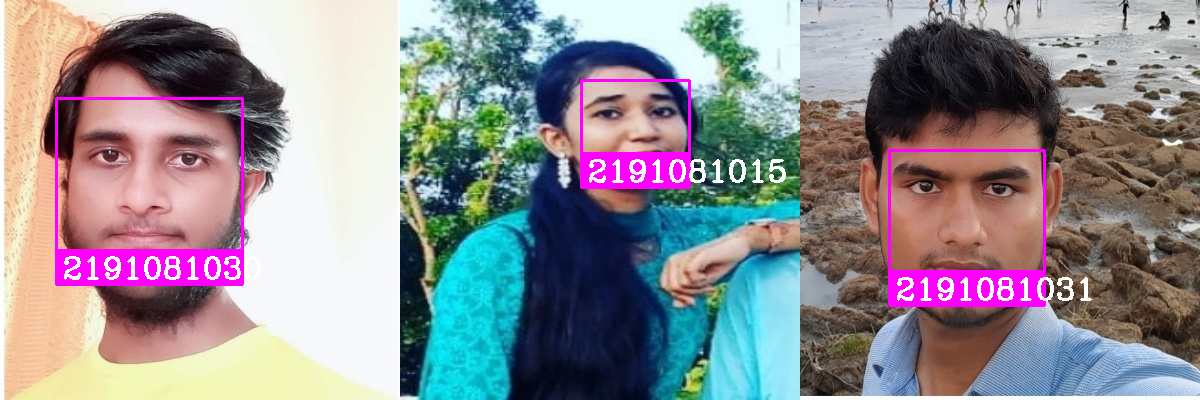

In [ ]:
# from face_recognition.api import face_encodings

encodeListKnown = findEncodings(images)

# print("This is encodeListKnown: ", encodeListKnown)
# print("*"*60)

path = "/content/drive/MyDrive/Deep Learning/Supervised Learning/CNN With Keras/Person Identification Project/Person Identification and Attendance System/Images/all_img.jpg"
# path = "/content/drive/MyDrive/Deep Learning/Supervised Learning/CNN/Images/all_img_blur.jpg"
unknown_face = cv2.imread(filename=path)

unknown_face_RGB = cv2.cvtColor(src=unknown_face, code=cv2.COLOR_BGR2RGB)


facesCurFrame = face_recognition.face_locations(img=unknown_face_RGB)
print("facesCurFrame",facesCurFrame)
print("*"*60)

encodesCurFrame = face_recognition.face_encodings(face_image=unknown_face_RGB, known_face_locations=facesCurFrame)
# print("encodesCurFrame",encodesCurFrame)
# print("*"*60)

name = ""
for encodeFace, faceLoc in zip(encodesCurFrame, facesCurFrame):
    matches = face_recognition.compare_faces(known_face_encodings=encodeListKnown, face_encoding_to_check=encodeFace)

    print("faceLoc: ",faceLoc)
    print("*"*60)

    print("matches: ",matches)
    print("*"*60)
    faceDistance = face_recognition.face_distance(face_encodings=encodeListKnown, face_to_compare=encodeFace)
    
    matchIndex = np.argmin(faceDistance)
    print("matchIndex",matchIndex)
    print("*"*60)

    if matches[matchIndex]:
        sid = classnames[matchIndex].capitalize()
        print("Student ID: ", sid)
        print("*"*60)

        y1, x2, y2, x1 = faceLoc # faceLoc:  (63, 162, 138, 88)

        # y1, x2, y2, x1 = y1 * 4, x2 * 4, y2 * 4, x1 * 4

        cv2.rectangle(img=unknown_face,pt1=(x1, y1), pt2=(x2, y2), color=(255,0,255), thickness=2)
        cv2.rectangle(img=unknown_face,pt1=(x1, y2-35), pt2=(x2, y2), color=(255,0,255), thickness=cv2.FILLED)
        cv2.putText(img=unknown_face, text=sid, org=(x1+6, y2-6), fontFace=cv2.FONT_HERSHEY_COMPLEX,
                    fontScale=1, color=(255,255,255), thickness=2)
        attendance(sid=sid)
        

# cv2.imshow("Image", unknown_face)
cv2_imshow(unknown_face)
cv2.waitKey()
cv2.destroyAllWindows()

# **Face Indetification from Video or Webcam**

In [5]:
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from base64 import b64decode, b64encode
import cv2
import numpy as np
import PIL
import io
import html
import time

In [ ]:
# cascade_path = "/content/drive/MyDrive/Deep Learning/Supervised Learning/CNN/haarcascade_frontalface_default.xml"

# cascade_obj = cv2.CascadeClassifier(cascade_path)

In [ ]:
# initialize the Haar Cascade face detection model
# face_cascade = cv2.CascadeClassifier(cv2.samples.findFile(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'))

In [10]:
path = "/content/drive/MyDrive/Deep Learning/Supervised Learning/CNN With Keras/Person Identification Project/Person Identification and Attendance System/Images/train_img"

images_v = []

classnames_v = []

myList_v = os.listdir(path=path)

In [11]:
print(myList_v)

['2191081031.jpg', '2191081030.jpg', '2191081015.jpg']


In [12]:
for img in myList_v:
    currentImg_v = cv2.imread(filename=f"{path}/{img}")
    images_v.append(currentImg_v)
    classnames_v.append(os.path.splitext(img)[0])

print(classnames_v)

['2191081031', '2191081030', '2191081015']


In [33]:
def findEncodings(images):
    encodeList = []

    for img in images:
        img = cv2.cvtColor(src=img, code=cv2.COLOR_BGR2RGB)
        encode = face_recognition.face_encodings(face_image=img)[0]
        encodeList.append(encode)
    return encodeList

In [16]:
# xlsx_path = "/content/drive/MyDrive/Deep Learning/Supervised Learning/CNN With Keras/Person Identification Project/Person Identification and Attendance System/demo.xlsx"

# wb = openpyxl.load_workbook(xlsx_path)

# ws = wb.active

# print(ws)



<Worksheet "Sheet">


In [17]:
# ws.max_row

1

In [24]:
# tu = [
#     ['alamin', '1', '22-04-3'],
#     ['rita', '2', '22-04-4'],
#     ['taneem', '3', '22-04-5']
# ]

# if ['alamin', '1'] not in tu:
#     print("yes")
# else:
#     print("no")

yes


In [42]:
# xlsx_path = "/content/drive/MyDrive/Deep Learning/Supervised Learning/CNN With Keras/Person Identification Project/Person Identification and Attendance System/demo.xlsx"

# wb = openpyxl.load_workbook(xlsx_path)

# ws = wb.active

# stu_info = {
#     '2191081015' : 'Rita',
#     '2191081030' : 'Alamin',
#     '2191081031' : 'Taneem',
# }

# stu_lis = []

# def takeAttendance(sid):
#     cdate, ctime = str(datetime.datetime.now()).split()
#     if len(stu_lis) != 0:
#         stuName = stu_info[sid]
#         if [stuName, sid, cdate, ctime] not in stu_lis:
#             stu_lis.append([stuName, sid, cdate, ctime])
#         else:
#             pass


        

In [80]:
# stu_info = {
#     '2191081015' : 'Rita',
#     '2191081030' : 'Alamin',
#     '2191081031' : 'Taneem',
#     '2191081026' : 'Tajnin',
# }



# def takeAttendance(sid):
#     stu_lis = []
#     print(sid)
#     # print("Opps")
#     cdate, ctime = str(datetime.datetime.now()).split()
#     if len(stu_lis) >= 0:
#         stuName = stu_info[sid]
#         if [stuName, sid, cdate] not in stu_lis:
#             stu_lis.append([stuName, sid, cdate])
#         else:
#             pass
#     print(stu_lis)

In [81]:
# takeAttendance('2191081030')
# takeAttendance('2191081030')
# takeAttendance('2191081031')
# takeAttendance('2191081026')

2191081030
[['Alamin', '2191081030', '2022-04-04']]
2191081030
[['Alamin', '2191081030', '2022-04-04']]
2191081031
[['Taneem', '2191081031', '2022-04-04']]
2191081026
[['Tajnin', '2191081026', '2022-04-04']]


In [78]:
# stu_lis

[['Alamin', '2191081030', '2022-04-04'],
 ['Taneem', '2191081031', '2022-04-04'],
 ['Tajnin', '2191081026', '2022-04-04']]

In [21]:
# cdate, ctime = str(datetime.datetime.now()).split()

# cdate

'2022-04-04'

In [31]:
# function to convert the JavaScript object into an OpenCV image
def js_to_image(js_reply):
  """
  Params:
          js_reply: JavaScript object containing image from webcam
  Returns:
          img: OpenCV BGR image
  """
  # decode base64 image
  image_bytes = b64decode(js_reply.split(',')[1])
  # convert bytes to numpy array
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  # decode numpy array into OpenCV BGR image
  img = cv2.imdecode(jpg_as_np, flags=1)

  return img

# function to convert OpenCV Rectangle bounding box image into base64 byte string to be overlayed on video stream
def bbox_to_bytes(bbox_array):
  """
  Params:
          bbox_array: Numpy array (pixels) containing rectangle to overlay on video stream.
  Returns:
        bytes: Base64 image byte string
  """
  # convert array into PIL image
  bbox_PIL = PIL.Image.fromarray(bbox_array, 'RGBA')
  iobuf = io.BytesIO()
  # format bbox into png for return
  bbox_PIL.save(iobuf, format='png')
  # format return string
  bbox_bytes = 'data:image/png;base64,{}'.format((str(b64encode(iobuf.getvalue()), 'utf-8')))

  return bbox_bytes

In [32]:
# JavaScript to properly create our live video stream using our webcam as input
def video_stream():
  js = Javascript('''
    var video;
    var div = null;
    var stream;
    var captureCanvas;
    var imgElement;
    var labelElement;
    
    var pendingResolve = null;
    var shutdown = false;
    
    function removeDom() {
       stream.getVideoTracks()[0].stop();
       video.remove();
       div.remove();
       video = null;
       div = null;
       stream = null;
       imgElement = null;
       captureCanvas = null;
       labelElement = null;
    }
    
    function onAnimationFrame() {
      if (!shutdown) {
        window.requestAnimationFrame(onAnimationFrame);
      }
      if (pendingResolve) {
        var result = "";
        if (!shutdown) {
          captureCanvas.getContext('2d').drawImage(video, 0, 0, 640, 480);
          result = captureCanvas.toDataURL('image/jpeg', 0.8)
        }
        var lp = pendingResolve;
        pendingResolve = null;
        lp(result);
      }
    }
    
    async function createDom() {
      if (div !== null) {
        return stream;
      }

      div = document.createElement('div');
      div.style.border = '2px solid black';
      div.style.padding = '3px';
      div.style.width = '100%';
      div.style.maxWidth = '600px';
      document.body.appendChild(div);
      
      const modelOut = document.createElement('div');
      modelOut.innerHTML = "<span>Status:</span>";
      labelElement = document.createElement('span');
      labelElement.innerText = 'No data';
      labelElement.style.fontWeight = 'bold';
      modelOut.appendChild(labelElement);
      div.appendChild(modelOut);
           
      video = document.createElement('video');
      video.style.display = 'block';
      video.width = div.clientWidth - 6;
      video.setAttribute('playsinline', '');
      video.onclick = () => { shutdown = true; };
      stream = await navigator.mediaDevices.getUserMedia(
          {video: { facingMode: "environment"}});
      div.appendChild(video);

      imgElement = document.createElement('img');
      imgElement.style.position = 'absolute';
      imgElement.style.zIndex = 1;
      imgElement.onclick = () => { shutdown = true; };
      div.appendChild(imgElement);
      
      const instruction = document.createElement('div');
      instruction.innerHTML = 
          '<span style="color: red; font-weight: bold;">' +
          'When finished, click here or on the video to stop this demo</span>';
      div.appendChild(instruction);
      instruction.onclick = () => { shutdown = true; };
      
      video.srcObject = stream;
      await video.play();

      captureCanvas = document.createElement('canvas');
      captureCanvas.width = 640; //video.videoWidth;
      captureCanvas.height = 480; //video.videoHeight;
      window.requestAnimationFrame(onAnimationFrame);
      
      return stream;
    }
    async function stream_frame(label, imgData) {
      if (shutdown) {
        removeDom();
        shutdown = false;
        return '';
      }

      var preCreate = Date.now();
      stream = await createDom();
      
      var preShow = Date.now();
      if (label != "") {
        labelElement.innerHTML = label;
      }
            
      if (imgData != "") {
        var videoRect = video.getClientRects()[0];
        imgElement.style.top = videoRect.top + "px";
        imgElement.style.left = videoRect.left + "px";
        imgElement.style.width = videoRect.width + "px";
        imgElement.style.height = videoRect.height + "px";
        imgElement.src = imgData;
      }
      
      var preCapture = Date.now();
      var result = await new Promise(function(resolve, reject) {
        pendingResolve = resolve;
      });
      shutdown = false;
      
      return {'create': preShow - preCreate, 
              'show': preCapture - preShow, 
              'capture': Date.now() - preCapture,
              'img': result};
    }
    ''')

  display(js)
  
def video_frame(label, bbox):
  data = eval_js('stream_frame("{}", "{}")'.format(label, bbox))
  return data

In [92]:
encodeListKnown = findEncodings(images_v)


xlsx_path = "/content/drive/MyDrive/Deep Learning/Supervised Learning/CNN With Keras/Person Identification Project/Person Identification and Attendance System/demo.xlsx"

wb = openpyxl.load_workbook(xlsx_path)

ws = wb.active

stu_info = {
    '2191081015' : 'Rita',
    '2191081030' : 'Alamin',
    '2191081031' : 'Taneem',
}

stu_lis = []
stu_lis2 = []

def takeAttendance(sid):
    cdate, ctime = str(datetime.datetime.now()).split()
    if len(stu_lis) >= 0:
        stuName = stu_info[sid]
        if [stuName, sid, cdate] not in stu_lis:
            stu_lis.append([stuName, sid, cdate])
            stu_lis2.append([stuName, sid, cdate, ctime])
        else:
            pass

# start streaming video from webcam
video_stream()
# label for video
label_html = 'Capturing your face...'
# initialze bounding box to empty
bbox = ''
count = 0



while True:
    js_reply = video_frame(label_html, bbox)
    if not js_reply:
        break

    # convert JS response to OpenCV Image

    # img = js_to_image(js_reply["img"])

    unknown_face = js_to_image(js_reply["img"])
    # print("Unknown Face shape: ",unknown_face.shape)
    # print("Unknown Face ndim: ",unknown_face.ndim)

    # create transparent overlay for bounding box
    bbox_array = np.zeros([480,640,4], dtype=np.uint8)
    # print("bbox_array shape: ",bbox_array.shape)
    # print("bbox_array ndim: ",bbox_array.ndim)
    # print(bbox_array)

    # grayscale image for face detection
    # gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

    unknown_face_RGB = cv2.cvtColor(src=unknown_face, code=cv2.COLOR_BGR2RGB)

    facesCurFrame = face_recognition.face_locations(img=unknown_face_RGB)
    # print("facesCurFrame",facesCurFrame)
    # print("*"*60)
    encodesCurFrame = face_recognition.face_encodings(face_image=unknown_face_RGB, known_face_locations=facesCurFrame)
    # print("encodesCurFrame",encodesCurFrame)
    # print("*"*60)
    name = ""

    for encodeFace, faceLoc in zip(encodesCurFrame, facesCurFrame):
        matches = face_recognition.compare_faces(known_face_encodings=encodeListKnown, face_encoding_to_check=encodeFace)

        # print("faceLoc: ",faceLoc)
        # print("*"*60)

        # print("matches: ",matches)
        # print("*"*60)
        faceDistance = face_recognition.face_distance(face_encodings=encodeListKnown, face_to_compare=encodeFace)
        
        matchIndex = np.argmin(faceDistance)


        if matches[matchIndex]:
            sid = classnames_v[matchIndex].capitalize()
            print("Student ID: ", sid)
            # print("*"*60)

            y1, x2, y2, x1 = faceLoc # faceLoc:  (63, 162, 138, 88)

            # bbox_array = cv2.rectangle(bbox_array,(x,y),(x+w,y+h),(255,0,0),2)
            bbox_array = cv2.rectangle(img=bbox_array,pt1=(x1, y1), pt2=(x2, y2), color=(255,0,255), thickness=2)

            cv2.rectangle(img=unknown_face,pt1=(x1, y1), pt2=(x2, y2), color=(255,0,255), thickness=2)
            cv2.rectangle(img=unknown_face,pt1=(x1, y2-35), pt2=(x2, y2), color=(255,0,255), thickness=cv2.FILLED)
            cv2.putText(img=unknown_face, text=sid, org=(x1+6, y2-6), fontFace=cv2.FONT_HERSHEY_COMPLEX,
                        fontScale=1, color=(255,255,255), thickness=2)
            
            takeAttendance(sid=sid)

            
    bbox_array[:,:,3] = (bbox_array.max(axis = 2) > 0 ).astype(int) * 255
    bbox_bytes = bbox_to_bytes(bbox_array)
    # print(bbox_bytes)
    bbox = bbox_bytes

    cv2_imshow(unknown_face)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break


print()
print(stu_lis)
# print()
# print(stu_lis2)

for row in stu_lis2:
    ws.append(row)
    
wb.save(xlsx_path)

Output hidden; open in https://colab.research.google.com to view.